#### Load libraries for cleaning and data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load data

In [0]:
filepath='/content/drive/My Drive/skychallenge_car_data.csv'

In [107]:
cars=pd.read_csv(filepath,index_col=0)
cars.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,NaN,rwd,NaN,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,1FAFP55UO4G113464,fwd,full-size,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


#### Basic info

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1723065 entries, 0 to 1723064
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   city          object 
 1   price         int64  
 2   year          float64
 3   manufacturer  object 
 4   make          object 
 5   condition     object 
 6   cylinders     object 
 7   fuel          object 
 8   odometer      float64
 9   title_status  object 
 10  transmission  object 
 11  vin           object 
 12  drive         object 
 13  size          object 
 14  type          object 
 15  paint_color   object 
 16  lat           float64
 17  long          float64
 18  county_fips   float64
 19  county_name   object 
 20  state_fips    float64
 21  state_code    object 
 22  state_name    object 
 23  weather       float64
dtypes: float64(7), int64(1), object(16)
memory usage: 328.6+ MB


In [4]:
cars.count()

city            1723065
price           1723065
year            1716750
manufacturer    1586651
make            1653366
condition       1022275
cylinders       1031774
fuel            1712698
odometer        1159011
title_status    1720511
transmission    1714043
vin              604850
drive           1061181
size             599098
type            1020134
paint_color     1027415
lat             1723065
long            1723065
county_fips     1664232
county_name     1664232
state_fips      1664232
state_code      1664232
state_name      1723065
weather         1663637
dtype: int64

In [5]:
cars.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather
count,1.723065e+06,1.716750e+06,1.159011e+06,1.723065e+06,1.723065e+06,1.664232e+06,1.664232e+06,1.663637e+06
mean,1.075540e+05,2.004841e+03,1.136387e+05,3.878195e+01,-9.371198e+01,2.843053e+04,2.834410e+01,5.378706e+01
std,1.004439e+07,1.208772e+01,1.368603e+05,5.976412e+00,1.696519e+01,1.605423e+04,1.603224e+01,7.799381e+00
min,1.000000e+00,3.020000e+02,0.000000e+00,-8.481005e+01,-1.000000e+03,1.001000e+03,1.000000e+00,2.900000e+01
25%,3.295000e+03,2.002000e+03,5.800000e+04,3.491900e+01,-1.058010e+02,1.212300e+04,1.200000e+01,4.800000e+01
50%,7.000000e+03,2.007000e+03,1.070000e+05,3.940989e+01,-8.824070e+01,2.902100e+04,2.900000e+01,5.300000e+01
75%,1.499900e+04,2.012000e+03,1.520000e+05,4.255459e+01,-8.102650e+01,4.106700e+04,4.100000e+01,5.900000e+01
max,2.068627e+09,2.019000e+03,1.000000e+07,9.000000e+01,1.397061e+02,5.604500e+04,5.600000e+01,7.900000e+01


#### Unification manufacturers' names

In [6]:
cars['manufacturer'].unique().shape

(54,)

In [0]:
manufacturer = {
    "alfa-romeo": ["alfa"],
    "aston-martin": ["aston"],
    "chevrolet": ["chevy", "chev"],
    "dodge": ["gmc"],
    "harley": ["harley-davidson"],
    "infiniti": ["infinity"],
    "land rover": ["landrover"],
    "volkswagen": ["vw"],
    "mercedes-benz": ["mercedes", "mercedesbenz"],
}

for (key, values) in manufacturer.items():
    for eq in values:
        cars.replace(eq, key, inplace = True)

#### Unification makes' names

In [8]:
cars['make'].unique().shape

(107446,)

Becouse of large amout of unique makes I will change name for few most popular.

In [0]:
make = {
    "f150": ["f-150"],
    "f250": ["2500","f-250"],
    "f350": ["3500","f-350"],
    "silverado 1500": ["1500",'silverado',"silverado 1500 ","1500 silverado"],
}

for (key, values) in make.items():
    for eq in values:
        cars.replace(eq, key, inplace = True)

In [10]:
cars['make'].value_counts().nlargest(15)

silverado 1500    59161
f150              32892
f250              28608
f350              18097
mustang           13136
accord            12798
wrangler          11791
civic             11644
camry             11473
altima            10789
explorer          10075
escape             9588
impala             9489
tahoe              9230
tacoma             8218
Name: make, dtype: int64

#### Dealing with outliers

##### Functions 

In [0]:
cars_copy=cars.copy()
def filter_outliers(source,column,bottom,top):
  q_bottom= source[column].quantile(bottom)
  q_top = source[column].quantile(top)
  return source.loc[(source[column]>q_bottom) & (source[column]<q_top) ]

In [0]:
def plot_impact(pre,post):
  plt.figure(figsize=(14,10))
  plt.suptitle('Impact of removing outliers on plots', fontsize=20)
  plt.subplot(2,2,1)
  plt.title('Car '+pre.name+' distribution plot')
  sns.distplot(pre)

  plt.subplot(2,2,2)
  plt.title('Car '+pre.name+' Spread')
  sns.boxplot(y=pre)

  plt.subplot(2,2,3)
  plt.title('Car Cleaned '+post.name+' distribution plot')
  sns.distplot(post)

  plt.subplot(2,2,4)
  plt.title('Car '+post.name+' Spread')
  sns.boxplot(y=post)

  plt.show()

##### Price outliers

In [13]:
cars.price.describe(percentiles = [0.015,0.25,0.50,0.75,0.85,0.90,0.995,1])

count    1.723065e+06
mean     1.075540e+05
std      1.004439e+07
min      1.000000e+00
1.5%     1.000000e+02
25%      3.295000e+03
50%      7.000000e+03
75%      1.499900e+04
85%      2.049900e+04
90%      2.500000e+04
99.5%    6.390000e+04
100%     2.068627e+09
max      2.068627e+09
Name: price, dtype: float64

In [0]:
cars_copy=filter_outliers(cars_copy,'price',0.02,0.99)

In [15]:
cars_copy.price.describe()

count    1.670080e+06
mean     1.057955e+04
std      9.641195e+03
min      3.010000e+02
25%      3.500000e+03
50%      7.200000e+03
75%      1.499500e+04
max      5.199800e+04
Name: price, dtype: float64

I have decied to remove bottom 2% and top 1%  of rows based on price. In this way we get rid of unreasonable data that differ in many orders of magnitude from others.

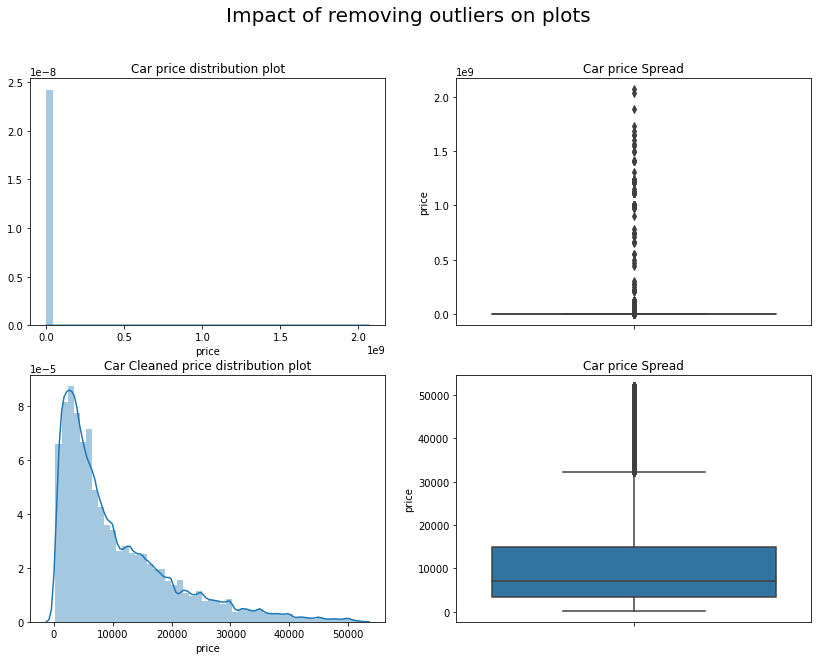

In [16]:
plot_impact(cars.price,cars_copy.price)

##### Odometer outliers

In [17]:
cars_copy.odometer.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.995,1])

count    1.134368e+06
mean     1.144593e+05
std      1.336311e+05
min      0.000000e+00
25%      6.000000e+04
50%      1.080000e+05
75%      1.528120e+05
85%      1.771579e+05
90%      1.945000e+05
99.5%    3.615641e+05
100%     1.000000e+07
max      1.000000e+07
Name: odometer, dtype: float64

In [0]:
cars_copy = filter_outliers(cars_copy,'odometer',0,0.99)

Removed 0,5% top rows based by odometer.

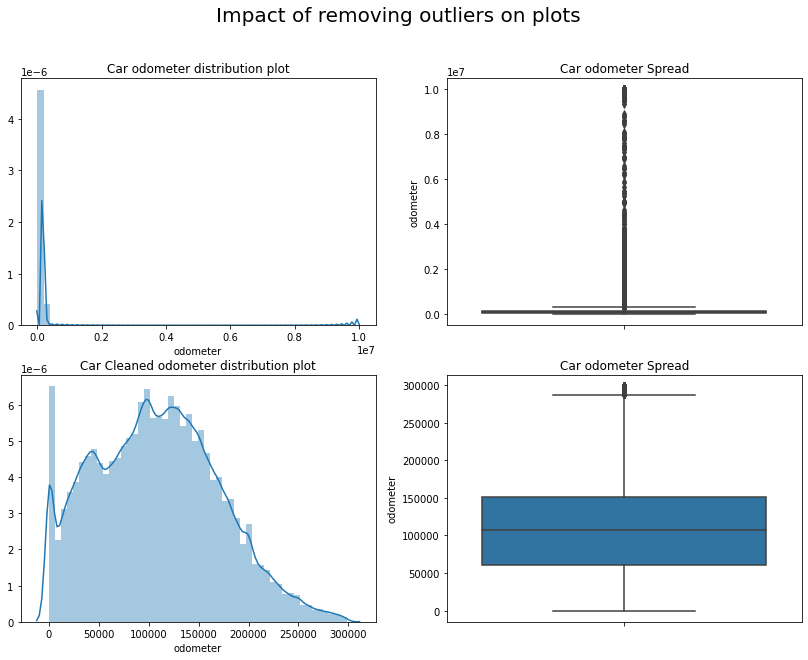

In [19]:
plot_impact(cars.odometer,cars_copy.odometer)

##### Year outliers

In [20]:
cars_copy.year.describe(percentiles = [0.02,0.25,0.50,0.75,1])

count    1.113591e+06
mean     2.007305e+03
std      8.532207e+00
min      1.900000e+03
2%       1.983000e+03
25%      2.004000e+03
50%      2.008000e+03
75%      2.013000e+03
100%     2.019000e+03
max      2.019000e+03
Name: year, dtype: float64

In [21]:
cars_copy.loc[(cars_copy['year'] <1966)].sort_values(by=['year'])

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
1050350,joplin,31816,1900.0,jeep,wrangler unlimited,NaN,6 cylinders,gas,19633.0,clean,automatic,1C4BJWDG1FL663116,4wd,NaN,SUV,yellow,37.862534,-94.027381,29039.0,Cedar,29.0,MO,Missouri,52.0
64612,topeka,13955,1900.0,NaN,MANCO DEUCE CART,good,NaN,gas,1.0,clean,automatic,3003072,rwd,compact,other,black,38.986133,-95.687764,20177.0,Shawnee,20.0,KS,Kansas,51.0
631491,losangeles,17999,1900.0,jeep,wrangler unlimited 4dr,excellent,6 cylinders,gas,137500.0,clean,manual,1J4GA39157L147183,4wd,mid-size,SUV,green,33.769817,-118.141599,6037.0,Los Angeles,6.0,CA,California,59.0
510468,oklahomacity,7500,1900.0,nissan,van,excellent,NaN,gas,116.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,35.478200,-97.348824,40109.0,Oklahoma,40.0,OK,Oklahoma,57.0
502686,maine,1500,1900.0,ford,f150 truck,NaN,NaN,gas,19999.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,43.642800,-70.537600,23031.0,York,23.0,ME,Maine,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967299,topeka,16500,1965.0,NaN,65 mustang,excellent,8 cylinders,gas,97000.0,clean,manual,NaN,rwd,NaN,coupe,NaN,45.856600,-93.081300,27115.0,Pine,27.0,MN,Minnesota,43.0
1540228,albuquerque,2800,1965.0,ford,econoline,good,6 cylinders,gas,90000.0,clean,automatic,NaN,fwd,NaN,van,white,35.071700,-106.509000,35001.0,Bernalillo,35.0,NM,New Mexico,45.0
1540248,albuquerque,17500,1965.0,NaN,1965 impala ss,excellent,8 cylinders,gas,87665.0,clean,automatic,ooooooooo,rwd,full-size,coupe,brown,35.074348,-106.700825,35001.0,Bernalillo,35.0,NM,New Mexico,45.0
966125,sd,16500,1965.0,NaN,65 mustang,excellent,8 cylinders,gas,97000.0,clean,manual,NaN,rwd,NaN,coupe,NaN,45.856600,-93.081300,27115.0,Pine,27.0,MN,Minnesota,43.0


"One of the first cars accessible to the masses was the 1908 Model T, an American car manufactured by the Ford Motor Company." [Wikipedia](https://en.wikipedia.org/wiki/Car)

In [0]:
cars_copy = filter_outliers(cars_copy,'year',0.02,1)

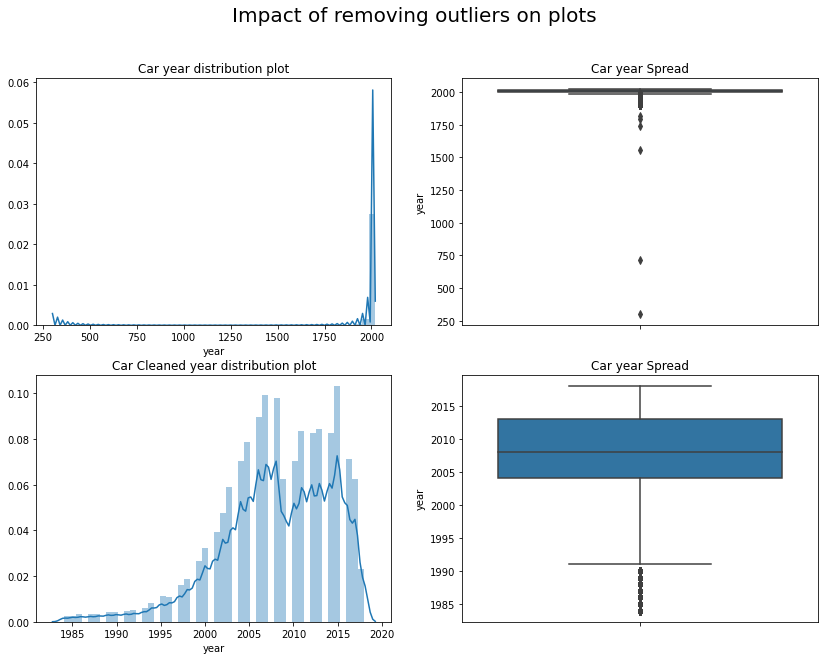

In [23]:
plot_impact(cars.year,cars_copy.year)

##### Lat Long outliers

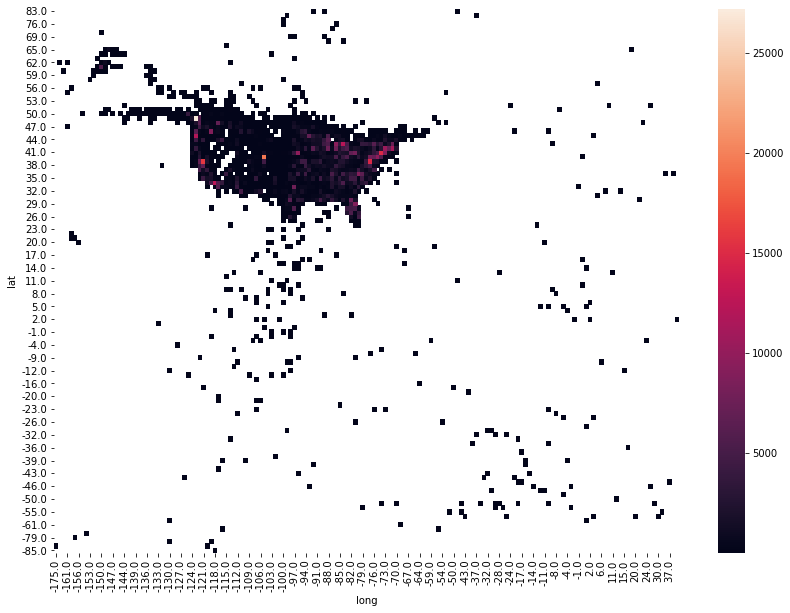

In [24]:
plt.figure(figsize=(14,10))
new_map=sns.heatmap(cars_copy[['lat', 'long']].round(0).groupby(['lat', 'long']).size().unstack())
new_map.invert_yaxis()
plt.show()

In the picture above you can see that most of the points form the shape of the USA. So I will remove data outside USA.

In [0]:
cars_copy=cars_copy[cars_copy.lat.between(19,65)& cars_copy.long.between(-162,-68)]

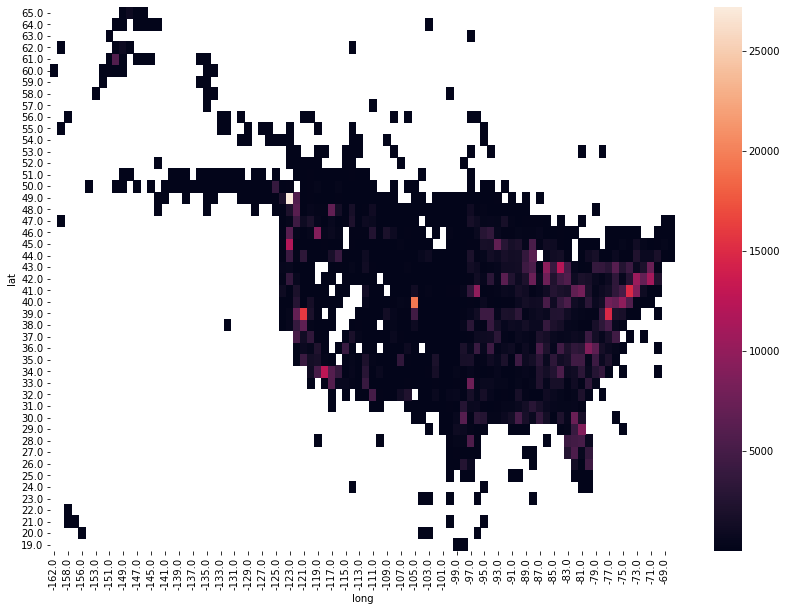

In [26]:
plt.figure(figsize=(14,10))
new_map=sns.heatmap(cars_copy[['lat', 'long']].round(0).groupby(['lat', 'long']).size().unstack())
new_map.invert_yaxis()
plt.show()

##### Outliers summary

In [27]:
cars=cars_copy
cars.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather
count,1.089761e+06,1.089761e+06,1.089761e+06,1.089761e+06,1.089761e+06,1.048363e+06,1.048363e+06,1.048126e+06
mean,1.191066e+04,2.008093e+03,1.097076e+05,3.920333e+01,-9.416643e+01,2.854183e+04,2.845499e+01,5.337171e+01
std,9.843235e+03,6.342666e+00,6.216194e+04,5.745873e+00,1.715629e+01,1.608611e+04,1.606339e+01,7.740535e+00
min,3.010000e+02,1.984000e+03,1.000000e+00,1.935432e+01,-1.618749e+02,1.001000e+03,1.000000e+00,2.900000e+01
25%,4.480000e+03,2.004000e+03,6.111300e+04,3.519770e+01,-1.078516e+02,1.212700e+04,1.200000e+01,4.800000e+01
50%,8.987000e+03,2.008000e+03,1.090000e+05,3.976220e+01,-8.853559e+01,2.903700e+04,2.900000e+01,5.300000e+01
75%,1.690000e+04,2.013000e+03,1.520170e+05,4.285106e+01,-8.107040e+01,4.105100e+04,4.100000e+01,5.900000e+01
max,5.199800e+04,2.018000e+03,2.989890e+05,6.499370e+01,-6.800340e+01,5.604500e+04,5.600000e+01,7.900000e+01


#### Relationship categorical columns with price

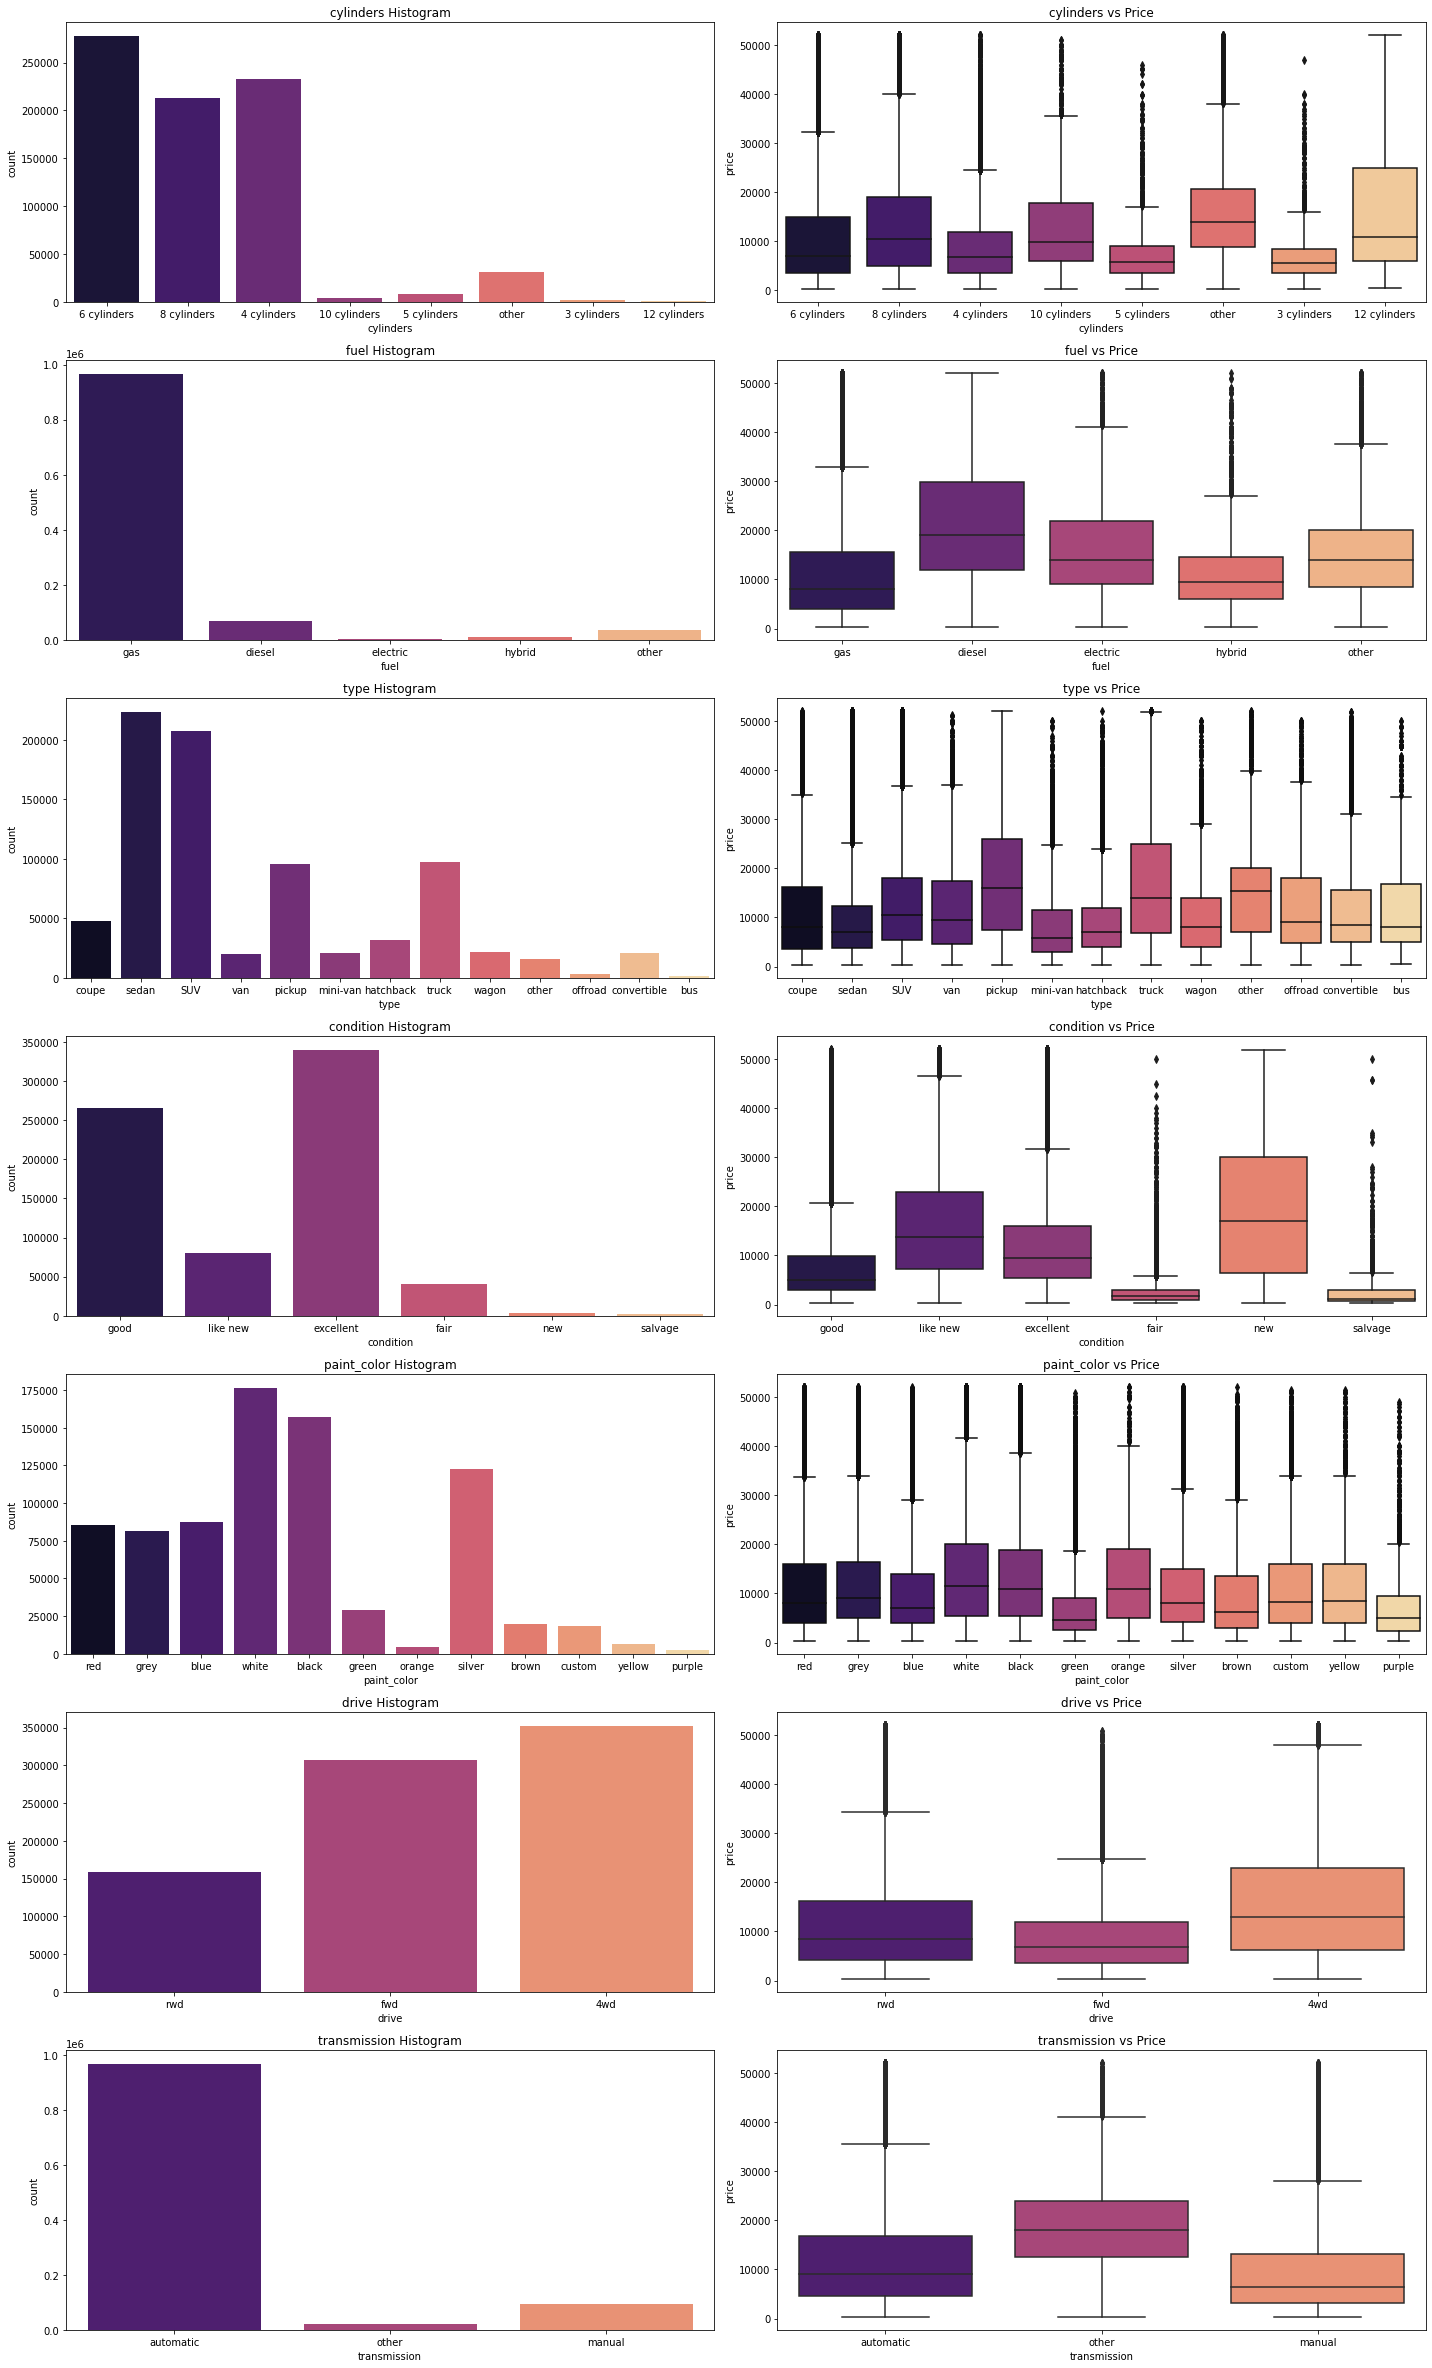

In [28]:
def plot_count(x,fig):
    plt.subplot(7,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(20,33))

plot_count('cylinders', 1)
plot_count('fuel', 3)
plot_count('type', 5)
plot_count('condition', 7)
plot_count('paint_color', 9)
plot_count('drive', 11)
plot_count('transmission', 13)

plt.tight_layout()

1. Most common number of cylinders are four, six and eight. The more cylinders, the higher the price.
2. Gas is most common fuel type. Electric and diesel cars have the highest price.
3. In type column the most popular are saden and SUV followed by truck and pick up which two have the highest average price.
4. Most cars are in good or excelent condition. The better the car condition is, the higher its price.
5. Most popular cars color are : white, black and silver
6. Cars with 4WD drive are most popular and also most expensive.
7. The vast majority of cars use an automatic transmission. But cars with other type of transmisions are most expensive.

#### Correlation numerical columns with price

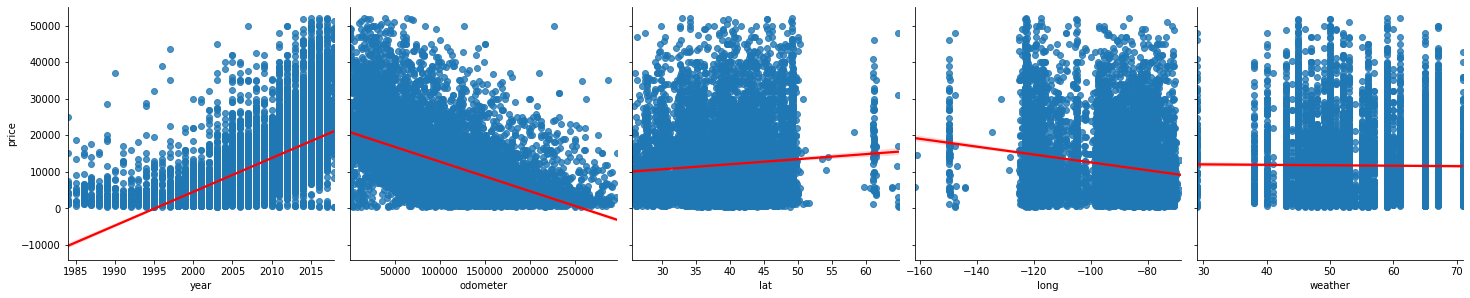

In [29]:
def pp(a,b,c,d,e):
    sns.pairplot(cars.sample(10000), x_vars=[a,b,c,d,e], y_vars='price',height=4, aspect=1, kind='reg', plot_kws={'line_kws':{'color':'red'}})
    plt.show()

pp('year','odometer', 'lat', 'long','weather')

In [30]:
print("Find most important features relative to price")
corr = cars.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to price
price          1.000000
year           0.602647
lat            0.087092
state_fips     0.006834
county_fips    0.006828
weather       -0.010861
long          -0.186889
odometer      -0.510634
Name: price, dtype: float64


1. Year are highly correlated with car price. Newer cars are more expensive.
2. Cars with less mileage are more expensive.
3. The further north-west the price of the car is higher.
4. The weather does not affect the price of the car

#### Geographical data

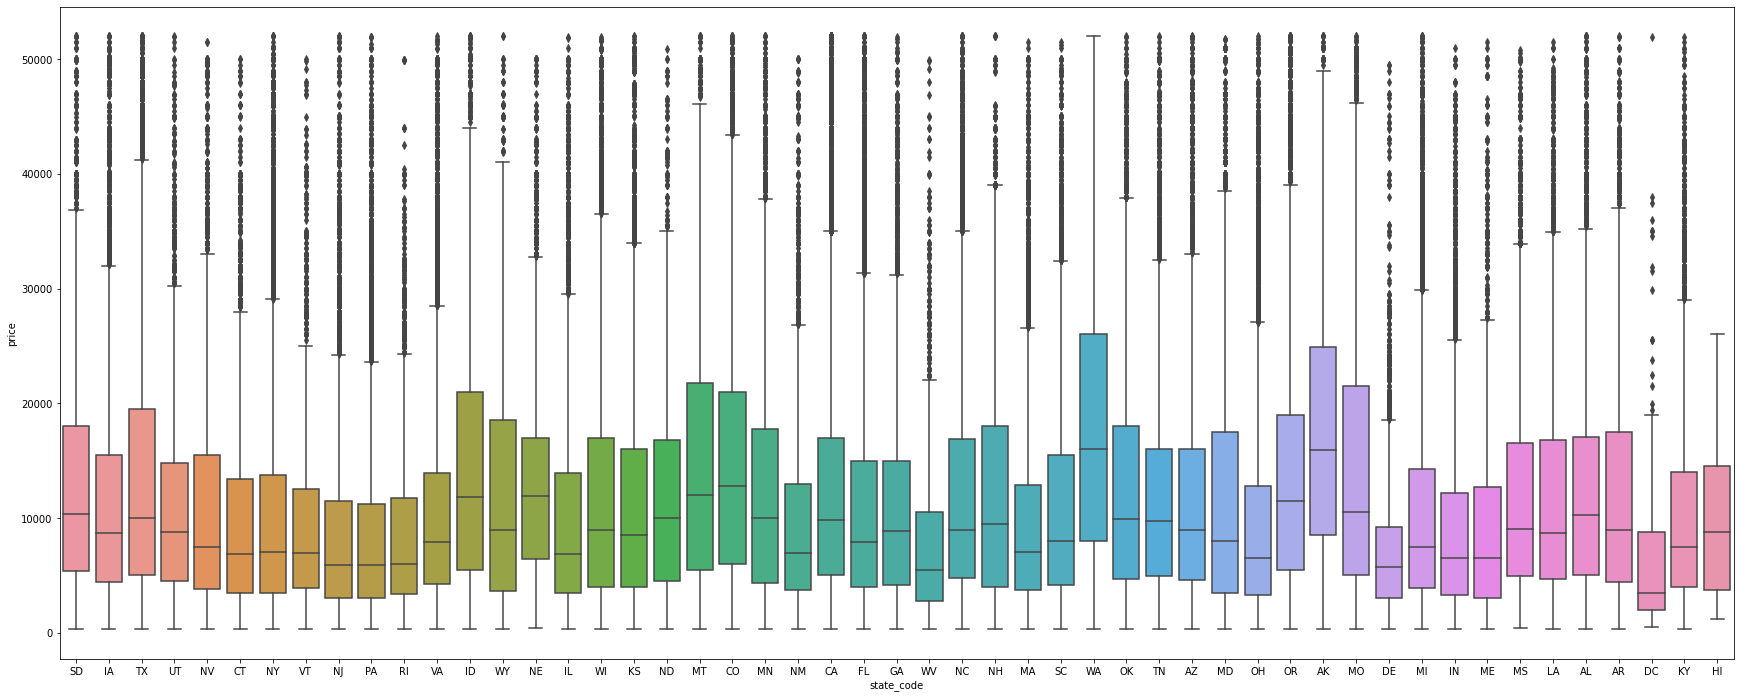

In [31]:
data = pd.concat([cars['price'], cars['state_code']], axis=1)
f, ax = plt.subplots(figsize=(30, 12))
fig = sns.boxplot(x='state_code', y="price", data=data)

Most expensive states are Alaska(AK) and Washington(WA) both of these states lie in the north-west of the country, which coincides with the lat-long data.

#### Drop unnecessary columns

City,state and county data coincide with longitude and latitude, so they will no longer be needed.Title status, vin and weather aren't corelated with car price.

In [0]:
cars.drop(columns=['county_fips', 'county_name', 'state_fips', 'state_code', 'state_name','title_status', 'vin', 'city','weather'],inplace=True)

#### Replacing car model with bins

Because of over 100,000 unique models, conversion to dummy variables requires a lot of space. I decided to convert it to containers based on the average price of the model.

In [0]:
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['make'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='make')
cars['carsrange'] = pd.qcut(temp.price_y, 12)
cars.drop(columns=['make'],inplace=True)

#### Dealing with NaN's

Only categorical columns contain empty fields, I will replace them with mode of column. And drop size column becouse ~60% cells are empty.

In [0]:
cars.drop(columns=['size'],inplace=True)

In [0]:
cat_cols=['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type','paint_color','carsrange']

In [0]:
for column in cat_cols:
  cars[column].fillna(cars[column].mode()[0], inplace=True)

Removing duplicates to prevent overfitting

In [0]:
cars.drop_duplicates(inplace=True)

In [38]:
for col in cars[cat_cols]:
  print(cars[col].unique())

['dodge' 'ford' 'jeep' 'chevrolet' 'hyundai' 'honda' 'ram' 'acura' 'bmw'
 'kia' 'volkswagen' 'nissan' 'audi' 'mercedes-benz' 'subaru' 'chrysler'
 'toyota' 'rover' 'mazda' 'cadillac' 'infiniti' 'lexus' 'mini' 'saturn'
 'lincoln' 'mitsubishi' 'buick' 'mercury' 'fiat' 'pontiac' 'volvo'
 'jaguar' 'alfa-romeo' 'harley' 'porche' 'land rover' 'aston-martin'
 'ferrari' 'datsun' 'hennessey' 'morgan']
['good' 'excellent' 'like new' 'fair' 'new' 'salvage']
['6 cylinders' '8 cylinders' '4 cylinders' '10 cylinders' '5 cylinders'
 'other' '3 cylinders' '12 cylinders']
['gas' 'diesel' 'electric' 'hybrid' 'other']
['automatic' 'other' 'manual']
['rwd' 'fwd' '4wd']
['coupe' 'sedan' 'SUV' 'van' 'pickup' 'mini-van' 'hatchback' 'truck'
 'wagon' 'other' 'offroad' 'convertible' 'bus']
['red' 'grey' 'white' 'blue' 'black' 'green' 'orange' 'silver' 'brown'
 'custom' 'yellow' 'purple']
[(11028.184, 12450.458], (14174.322, 16671.403], (6891.871, 8099.604], (300.999, 3730.086], (20995.0, 51998.0], ..., (5396.519

#### One-hot encoding

In [0]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

for col in cat_cols:
  cars = dummies(col,cars)


#### Normalizing price by log transformation

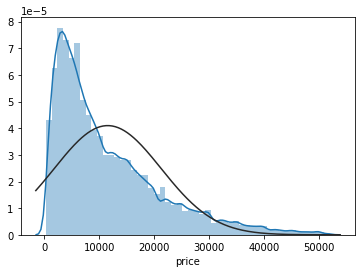

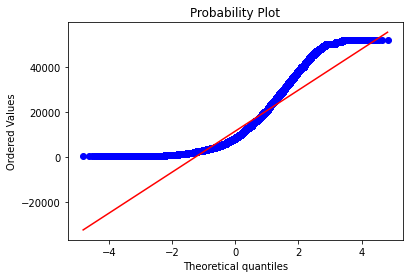

In [40]:
from scipy.stats import norm
from scipy import stats

sns.distplot(cars['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(cars['price'], plot=plt)

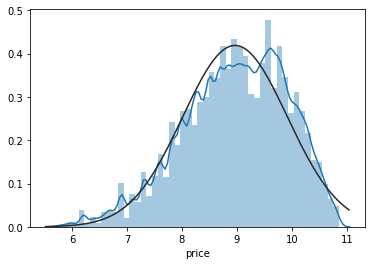

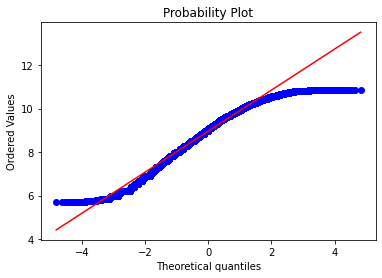

In [41]:
cars['price'] = np.log(cars['price'])
sns.distplot(cars['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(cars['price'], plot=plt)

#### Normalizing features

In [0]:
from sklearn.preprocessing import MinMaxScaler
cars.drop(columns=[])
scaler = MinMaxScaler()
num_vars = ['year','odometer']
cars[num_vars] = scaler.fit_transform(cars[num_vars])

#### Split into train and test

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cars, test_size = 0.1, random_state = 42)

X_train = train_set.drop("price", axis=1)
y_train = train_set["price"]

X_test  = test_set.drop("price", axis=1)
y_test = test_set["price"]


### Model buliding

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
lin_reg = model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7008704813020572


In [46]:
pred=model.predict(X_test)
r2_score(np.exp(y_test),np.exp(pred))

0.6984966749730359

In [76]:
mean_squared_error(np.exp(y_test),np.exp(pred))

30688027.3244325

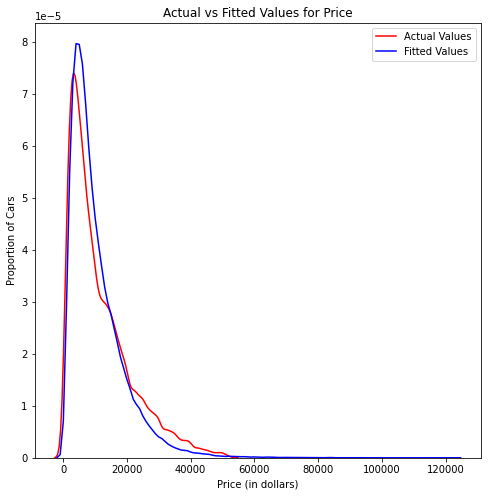

In [47]:
plt.figure(figsize=(8,8))
ax1=sns.distplot(np.exp(y_test),hist=False,color="r",label="Actual Values")
sns.distplot(np.exp(pred),hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

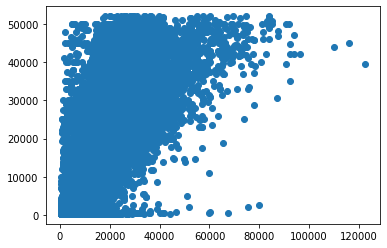

In [48]:
plt.scatter(np.exp(pred),np.exp(y_test))

#### Decision Tree

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state=1,max_depth=16)
regressor.fit(X_train, y_train)
score=regressor.score(X_train, y_train)
tree_preds = regressor.predict(X_test)
score_r2=r2_score(y_test,tree_preds)

print(score)
print(score_r2)

0.7713453693488531
0.7466398772329498


In [78]:
mean_squared_error(np.exp(y_test),np.exp(tree_preds))

22917813.555454414

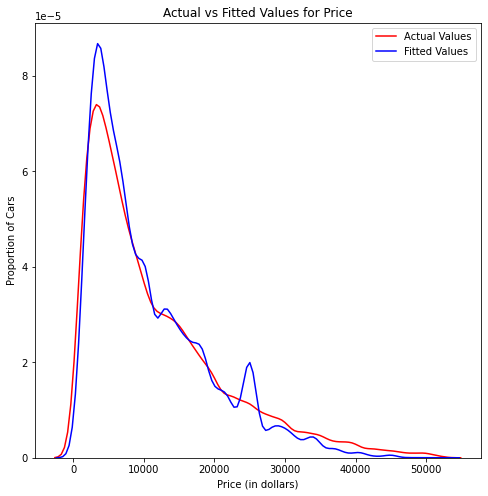

In [55]:
plt.figure(figsize=(8,8))
ax1=sns.distplot(np.exp(y_test),hist=False,color="r",label="Actual Values")
sns.distplot(np.exp(tree_preds),hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

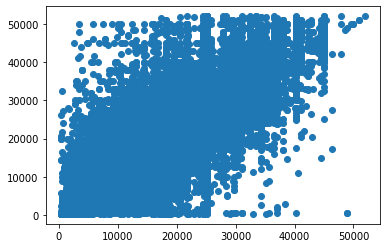

In [56]:
plt.scatter(np.exp(tree_preds),np.exp(y_test))

#### Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1,n_estimators=15)
forest_model.fit(X_train, y_train)
print(forest_model.score(X_train, y_train))
melb_preds = forest_model.predict(X_test)
print(r2_score(y_test,melb_preds))

0.971933686082288
0.8303123261802394


In [102]:
mean_squared_error(np.exp(y_test),np.exp(melb_preds))

17253726.410864525

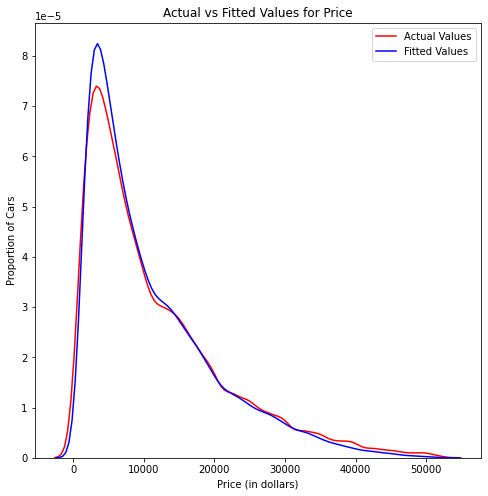

In [59]:
plt.figure(figsize=(8,8))
ax1=sns.distplot(np.exp(y_test),hist=False,color="r",label="Actual Values")
sns.distplot(np.exp(melb_preds),hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

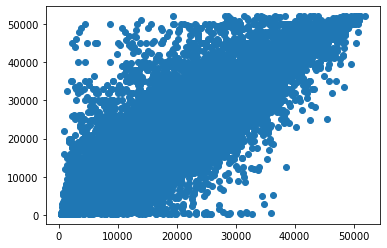

In [60]:
plt.scatter(np.exp(melb_preds),np.exp(y_test))

#### Gradient Boosting Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=8)
gbr.fit(X_train, y_train)


In [62]:
gbr_predicted = gbr.predict(X_test)
gbr_score=gbr.score(X_train, y_train)
gbr_score_r2=r2_score(y_test, gbr_predicted)
print(gbr_score)
print(gbr_score_r2)

0.799572428109566
0.7894081170363849


In [80]:
mean_squared_error(np.exp(y_test),np.exp(gbr_predicted))

19547365.469349165

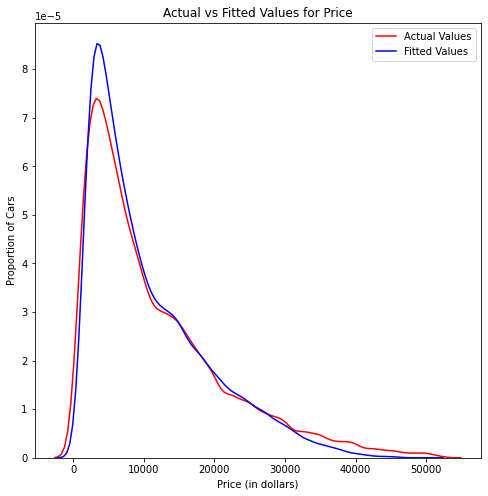

In [63]:
plt.figure(figsize=(8,8))
ax1=sns.distplot(np.exp(y_test),hist=False,color="r",label="Actual Values")
sns.distplot(np.exp(gbr_predicted),hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

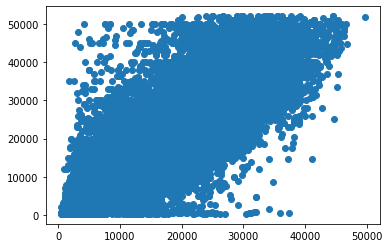

In [64]:
plt.scatter(np.exp(gbr_predicted),np.exp(y_test))

### Summary

Metrics for models:<br>
**Linear Regression**:<br>
R^2: 0.6984966749730359<br>
MSE: 30688027.3244325<br>

**Decision Tree**:<br>
R^2: 0.7466398772329498<br>
MSE: 22917813.555454414<br>

**Random Forest regressor**:<br>
R^2: 0.8303123261802394<br>
MSE: 17253726.410864525<br>

**Gradient Boosting Regressor**:<br>
R^2: 0.7894081170363849<br>
MSE: 19547365.469349165<br>

For Random Forest R^2 score is the highest and MSE is the lowest.